### 두개의 데이터 셋을 합치고 처리하기

### 데이터 참고 사이트 
* our world in data
  * https://ourworldindata.org/covid-vaccinations
* bloomberg.com
  * https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/
  
* 코로나 19(COVID-19) 실시간 상황판
  * https://coronaboard.kr/

In [19]:
from IPython.display import display, Image
import os, warnings
import re
warnings.filterwarnings(action='ignore')

### 01 파일 불러오기

In [20]:
os.listdir(os.getcwd())

['.git',
 '.ipynb_checkpoints',
 '01_dataScraping_corona01_today.ipynb',
 '01_dataScraping_corona02.ipynb',
 '02_dataScraping_bloomberg.ipynb',
 '03_corona_vaccine_merge.ipynb',
 '04_analysis_corr.ipynb',
 'chromedriver',
 'data',
 'html_pdf',
 'README.md',
 'today_corona.csv']

In [21]:
import pandas as pd

# excel 데이터 셋도 pd.read_excel로 가져올 수 있음.
corona = pd.read_csv("./data/2021-08-07_corona.csv")
vaccine = pd.read_csv("./data/20210808_16_vaccine_bloomberg.csv")
country_code = pd.read_excel("./data/country.xlsx")

corona.shape, vaccine.shape, country_code.shape

((221, 12), (203, 6), (227, 4))

In [22]:
corona.head()

,국가,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,13081\n+210,1.7,81.9,110328,331002651,36449535,144461.0,632647,748.0,29834481.0,28888.0
1,인도🇮🇳,8944,1.3,97.3,23141,1380004385,31902422,40647.0,427565,657.0,31055861.0,40017.0
2,브라질🇧🇷,8318,2.8,93.8,94805,212559417,20108746,42159.0,561807,1006.0,18868602.0,28370.0
3,러시아🇷🇺,2300,2.6,89.3,44026,145934462,6424884,22320.0,164094,793.0,5739838.0,19485.0
4,프랑스🇫🇷,1458\n+38,1.8,91.8,96283,65273511,6258953,25077.0,112158,60.0,5743040.0,10889.0


In [23]:
vaccine.head()

,country,Doses_administered,percent_of_people:,1_percent,2_percent,Daily_rate_of_doses
0,Global Total,4.414064e+09,-999.0,-999.0,-999.0,42600504.0
1,Mainland China,1.757780e+09,62.8,44.4,15.9,17197856.0
2,India,5.062183e+08,18.5,28.8,8.2,5565503.0
3,EU,4.878405e+08,54.9,60.9,52.5,2513484.0
4,U.S.,3.506272e+08,54.8,58.5,50.1,712389.0


In [24]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


### 코로나에 나라명이 있으면 해당되는 열을 붙여라

In [25]:
corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)')

,0
0,미국
1,인도
2,브라질
3,러시아
4,프랑스
...,...
216,마셜
217,바누아투
218,사모아
219,세인트헬레나


In [26]:
corona['hangul_code'] = corona['국가'].str.extract('([ㄱ-ㅣ가-힣]+)', expand=False)
corona.columns

Index(['국가', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', 'hangul_code'],
      dtype='object')

In [27]:
col = ['국가', 'hangul_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일']
new_corona = corona[col].copy()
new_corona



,국가,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,13081\n+210,1.7,81.9,110328,331002651,36449535,144461.0,632647,748.0,29834481.0,28888.0
1,인도🇮🇳,인도,8944,1.3,97.3,23141,1380004385,31902422,40647.0,427565,657.0,31055861.0,40017.0
2,브라질🇧🇷,브라질,8318,2.8,93.8,94805,212559417,20108746,42159.0,561807,1006.0,18868602.0,28370.0
3,러시아🇷🇺,러시아,2300,2.6,89.3,44026,145934462,6424884,22320.0,164094,793.0,5739838.0,19485.0
4,프랑스🇫🇷,프랑스,1458\n+38,1.8,91.8,96283,65273511,6258953,25077.0,112158,60.0,5743040.0,10889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,마셜 제도🇲🇭,마셜,NaN,-,100.0,68,59190,4,NaN,0,NaN,4.0,NaN
217,바누아투🇻🇺,바누아투,NaN,25,75.0,13,307145,4,NaN,1,NaN,3.0,NaN
218,사모아🇼🇸,사모아,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN
219,세인트헬레나🇸🇭,세인트헬레나,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN


### 두 데이터 셋 연결

In [28]:
new_corona.head()

,국가,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일
0,미국🇺🇸,미국,13081\n+210,1.7,81.9,110328,331002651,36449535,144461.0,632647,748.0,29834481.0,28888.0
1,인도🇮🇳,인도,8944,1.3,97.3,23141,1380004385,31902422,40647.0,427565,657.0,31055861.0,40017.0
2,브라질🇧🇷,브라질,8318,2.8,93.8,94805,212559417,20108746,42159.0,561807,1006.0,18868602.0,28370.0
3,러시아🇷🇺,러시아,2300,2.6,89.3,44026,145934462,6424884,22320.0,164094,793.0,5739838.0,19485.0
4,프랑스🇫🇷,프랑스,1458\n+38,1.8,91.8,96283,65273511,6258953,25077.0,112158,60.0,5743040.0,10889.0


In [29]:
country_code.head()

,국문(코로나보드),영문(블룸버그),나라,비고_뜻
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


In [30]:
country_code.columns = ['han_code', 'eng_code', 'country', 'etc']
country_code.head()

,han_code,eng_code,country,etc
0,가나,Ghana,NaN,NaN
1,가봉,Gabon,NaN,NaN
2,가이아나,Guyana,NaN,NaN
3,감비아,Gambia,NaN,NaN
4,과들루프,NaN,프랑스,Guadeloupe


In [31]:
df_corona = new_corona.merge(country_code, left_on='hangul_code', 
                             right_on='han_code')
df_corona.head()

,국가,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,han_code,eng_code,country,etc
0,미국🇺🇸,미국,13081\n+210,1.7,81.9,110328,331002651,36449535,144461.0,632647,748.0,29834481.0,28888.0,미국,U.S.,NaN,NaN
1,인도🇮🇳,인도,8944,1.3,97.3,23141,1380004385,31902422,40647.0,427565,657.0,31055861.0,40017.0,인도,India,NaN,NaN
2,브라질🇧🇷,브라질,8318,2.8,93.8,94805,212559417,20108746,42159.0,561807,1006.0,18868602.0,28370.0,브라질,Brazil,NaN,NaN
3,러시아🇷🇺,러시아,2300,2.6,89.3,44026,145934462,6424884,22320.0,164094,793.0,5739838.0,19485.0,러시아,Russia,NaN,NaN
4,프랑스🇫🇷,프랑스,1458\n+38,1.8,91.8,96283,65273511,6258953,25077.0,112158,60.0,5743040.0,10889.0,프랑스,France,NaN,NaN


In [32]:
df_corona.drop(['국가', 'han_code', 'country', 'etc'], axis=1, inplace=True)
df_corona.head()

,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code
0,미국,13081\n+210,1.7,81.9,110328,331002651,36449535,144461.0,632647,748.0,29834481.0,28888.0,U.S.
1,인도,8944,1.3,97.3,23141,1380004385,31902422,40647.0,427565,657.0,31055861.0,40017.0,India
2,브라질,8318,2.8,93.8,94805,212559417,20108746,42159.0,561807,1006.0,18868602.0,28370.0,Brazil
3,러시아,2300,2.6,89.3,44026,145934462,6424884,22320.0,164094,793.0,5739838.0,19485.0,Russia
4,프랑스,1458\n+38,1.8,91.8,96283,65273511,6258953,25077.0,112158,60.0,5743040.0,10889.0,France


In [33]:
vaccine.head()

,country,Doses_administered,percent_of_people:,1_percent,2_percent,Daily_rate_of_doses
0,Global Total,4.414064e+09,-999.0,-999.0,-999.0,42600504.0
1,Mainland China,1.757780e+09,62.8,44.4,15.9,17197856.0
2,India,5.062183e+08,18.5,28.8,8.2,5565503.0
3,EU,4.878405e+08,54.9,60.9,52.5,2513484.0
4,U.S.,3.506272e+08,54.8,58.5,50.1,712389.0


In [34]:
df_corona_all = df_corona.merge(vaccine, left_on='eng_code', right_on='country')
df_corona_all.head()

,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code,country,Doses_administered,percent_of_people:,1_percent,2_percent,Daily_rate_of_doses
0,미국,13081\n+210,1.7,81.9,110328,331002651,36449535,144461.0,632647,748.0,29834481.0,28888.0,U.S.,U.S.,350627200.0,54.8,58.5,50.1,712389.0
1,인도,8944,1.3,97.3,23141,1380004385,31902422,40647.0,427565,657.0,31055861.0,40017.0,India,India,506218300.0,18.5,28.8,8.2,5565503.0
2,브라질,8318,2.8,93.8,94805,212559417,20108746,42159.0,561807,1006.0,18868602.0,28370.0,Brazil,Brazil,149469810.0,36.6,52.0,21.1,1426282.0
3,러시아,2300,2.6,89.3,44026,145934462,6424884,22320.0,164094,793.0,5739838.0,19485.0,Russia,Russia,66216816.0,22.6,25.9,18.4,579461.0
4,프랑스,1458\n+38,1.8,91.8,96283,65273511,6258953,25077.0,112158,60.0,5743040.0,10889.0,France,France,77681230.0,59.9,68.9,57.3,517893.0


In [35]:
df_corona_all.drop(['country'], axis=1, inplace=True)
df_corona_all

,hangul_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,eng_code,Doses_administered,percent_of_people:,1_percent,2_percent,Daily_rate_of_doses
0,미국,13081\n+210,1.7,81.9,110328,331002651,36449535,144461.0,632647,748.0,29834481.0,28888.0,U.S.,350627200.0,54.8,58.5,50.1,712389.0
1,인도,8944,1.3,97.3,23141,1380004385,31902422,40647.0,427565,657.0,31055861.0,40017.0,India,506218300.0,18.5,28.8,8.2,5565503.0
2,브라질,8318,2.8,93.8,94805,212559417,20108746,42159.0,561807,1006.0,18868602.0,28370.0,Brazil,149469810.0,36.6,52.0,21.1,1426282.0
3,러시아,2300,2.6,89.3,44026,145934462,6424884,22320.0,164094,793.0,5739838.0,19485.0,Russia,66216816.0,22.6,25.9,18.4,579461.0
4,프랑스,1458\n+38,1.8,91.8,96283,65273511,6258953,25077.0,112158,60.0,5743040.0,10889.0,France,77681230.0,59.9,68.9,57.3,517893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,NaN,-,90.5,97,649335,63,NaN,0,NaN,57.0,1.0,Macau,523029.0,38.5,42.6,34.5,1897.0
174,몬트세랫,NaN,4.5,90.9,4407,4992,22,1.0,1,NaN,20.0,NaN,Montserrat,2791.0,27.9,29.1,26.7,7.0
175,사모아,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,Samoa,84413.0,21.0,30.7,-999.0,1483.0
176,세인트헬레나,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,St. Helena,7091.0,59.1,59.4,58.8,120.0


In [36]:
df_corona_all.columns

Index(['hangul_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', 'eng_code', 'Doses_administered',
       'percent_of_people:', '1_percent', '2_percent', 'Daily_rate_of_doses'],
      dtype='object')

In [38]:
sel = ['hangul_code', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계', '확진자1일',
       '사망자합계', '사망자1일', '완치합계', '완치1일', 'Doses_administered',
       'percent_of_people:', '1_percent', '2_percent',  'Daily_rate_of_doses' ]
df_corona_all_n = df_corona_all[sel].copy()
df_corona_all_n

,hangul_code,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,Doses_administered,percent_of_people:,1_percent,2_percent,Daily_rate_of_doses
0,미국,U.S.,13081\n+210,1.7,81.9,110328,331002651,36449535,144461.0,632647,748.0,29834481.0,28888.0,350627200.0,54.8,58.5,50.1,712389.0
1,인도,India,8944,1.3,97.3,23141,1380004385,31902422,40647.0,427565,657.0,31055861.0,40017.0,506218300.0,18.5,28.8,8.2,5565503.0
2,브라질,Brazil,8318,2.8,93.8,94805,212559417,20108746,42159.0,561807,1006.0,18868602.0,28370.0,149469810.0,36.6,52.0,21.1,1426282.0
3,러시아,Russia,2300,2.6,89.3,44026,145934462,6424884,22320.0,164094,793.0,5739838.0,19485.0,66216816.0,22.6,25.9,18.4,579461.0
4,프랑스,France,1458\n+38,1.8,91.8,96283,65273511,6258953,25077.0,112158,60.0,5743040.0,10889.0,77681230.0,59.9,68.9,57.3,517893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,90.5,97,649335,63,NaN,0,NaN,57.0,1.0,523029.0,38.5,42.6,34.5,1897.0
174,몬트세랫,Montserrat,NaN,4.5,90.9,4407,4992,22,1.0,1,NaN,20.0,NaN,2791.0,27.9,29.1,26.7,7.0
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,84413.0,21.0,30.7,-999.0,1483.0
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7091.0,59.1,59.4,58.8,120.0


In [39]:
df_corona_all_n.columns

Index(['hangul_code', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수',
       '확진자_합계', '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일',
       'Doses_administered', 'percent_of_people:', '1_percent', '2_percent',
       'Daily_rate_of_doses'],
      dtype='object')

In [40]:
df_corona_all_n.columns = ['국가명', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일','백신접종', '접종률(인구)', '1차접종', '2차접종',
       '접종비율(일간)']
df_corona_all_n

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간)
0,미국,U.S.,13081\n+210,1.7,81.9,110328,331002651,36449535,144461.0,632647,748.0,29834481.0,28888.0,350627200.0,54.8,58.5,50.1,712389.0
1,인도,India,8944,1.3,97.3,23141,1380004385,31902422,40647.0,427565,657.0,31055861.0,40017.0,506218300.0,18.5,28.8,8.2,5565503.0
2,브라질,Brazil,8318,2.8,93.8,94805,212559417,20108746,42159.0,561807,1006.0,18868602.0,28370.0,149469810.0,36.6,52.0,21.1,1426282.0
3,러시아,Russia,2300,2.6,89.3,44026,145934462,6424884,22320.0,164094,793.0,5739838.0,19485.0,66216816.0,22.6,25.9,18.4,579461.0
4,프랑스,France,1458\n+38,1.8,91.8,96283,65273511,6258953,25077.0,112158,60.0,5743040.0,10889.0,77681230.0,59.9,68.9,57.3,517893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,90.5,97,649335,63,NaN,0,NaN,57.0,1.0,523029.0,38.5,42.6,34.5,1897.0
174,몬트세랫,Montserrat,NaN,4.5,90.9,4407,4992,22,1.0,1,NaN,20.0,NaN,2791.0,27.9,29.1,26.7,7.0
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,84413.0,21.0,30.7,-999.0,1483.0
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7091.0,59.1,59.4,58.8,120.0


In [41]:
df_corona_all_n.sort_values(['접종률(인구)'], ascending=False)

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간)
158,지브롤터,Gibraltar,11\n-4,1.9,93.3,151851,33691,5116,15.0,95,NaN,4771.0,102.0,78489.0,115.40,115.7,115.10,12.0
107,몰디브,Maldives,11,0.3,96.4,144749,540544,78130,131.0,222,NaN,75353.0,100.0,604808.0,81.30,87.7,74.90,2414.0
170,그린란드,Greenland,NaN,-,60.1,2959,56770,168,17.0,0,NaN,101.0,11.0,92149.0,80.80,113.3,48.30,772.0
39,아랍에미레이트,UAE,NaN,0.3,96.7,69922,9890402,691554,1545.0,1971,2.0,668554.0,1480.0,17097354.0,79.50,73.7,66.00,43091.0
72,바레인,Bahrain,4,0.5,99.1,158647,1701575,269848,111.0,1384,NaN,267406.0,105.0,2357620.0,79.40,75.2,71.60,28288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,남수단,South Sudan,NaN,1.1,94.7,992,11193725,11100,10.0,120,NaN,10514.0,NaN,56989.0,0.20,0.4,0.05,153.0
159,차드,Chad,NaN,3.5,96.4,303,16425864,4977,1.0,174,NaN,4796.0,NaN,26537.0,0.10,0.1,0.10,403.0
138,부르키나파소,Burkina Faso,NaN,1.2,98.4,651,20903273,13610,11.0,169,NaN,13391.0,6.0,35402.0,0.10,0.2,-999.00,173.0
82,알제리,Algeria,52\n+17,2.5,66.9,4113,43851044,179216,1203.0,4487,46.0,119888.0,736.0,75000.0,0.10,-999.0,-999.00,6248.0


In [42]:
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국가명       178 non-null    object 
 1   eng_code  178 non-null    object 
 2   위중증       125 non-null    object 
 3   치명(%)     178 non-null    object 
 4   완치(%)     175 non-null    float64
 5   발생률       178 non-null    object 
 6   인구수       178 non-null    object 
 7   확진자_합계    178 non-null    int64  
 8   확진자1일     146 non-null    float64
 9   사망자합계     178 non-null    int64  
 10  사망자1일     103 non-null    float64
 11  완치합계      175 non-null    float64
 12  완치1일      136 non-null    float64
 13  백신접종      178 non-null    float64
 14  접종률(인구)   178 non-null    float64
 15  1차접종      178 non-null    float64
 16  2차접종      178 non-null    float64
 17  접종비율(일간)  178 non-null    float64
dtypes: float64(10), int64(2), object(6)
memory usage: 26.4+ KB


In [43]:
df_corona_all_n['발생률'] = df_corona_all_n['발생률'].astype(int)
df_corona_all_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국가명       178 non-null    object 
 1   eng_code  178 non-null    object 
 2   위중증       125 non-null    object 
 3   치명(%)     178 non-null    object 
 4   완치(%)     175 non-null    float64
 5   발생률       178 non-null    int32  
 6   인구수       178 non-null    object 
 7   확진자_합계    178 non-null    int64  
 8   확진자1일     146 non-null    float64
 9   사망자합계     178 non-null    int64  
 10  사망자1일     103 non-null    float64
 11  완치합계      175 non-null    float64
 12  완치1일      136 non-null    float64
 13  백신접종      178 non-null    float64
 14  접종률(인구)   178 non-null    float64
 15  1차접종      178 non-null    float64
 16  2차접종      178 non-null    float64
 17  접종비율(일간)  178 non-null    float64
dtypes: float64(10), int32(1), int64(2), object(5)
memory usage: 25.7+ KB


In [44]:
df_corona_all_n['발생률_순위'] = df_corona_all_n['발생률'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n['접종률_순위'] = df_corona_all_n['접종률(인구)'].rank(ascending=False) # ascending=False : 내림차순
df_corona_all_n

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간),발생률_순위,접종률_순위
0,미국,U.S.,13081\n+210,1.7,81.9,110328,331002651,36449535,144461.0,632647,748.0,29834481.0,28888.0,350627200.0,54.8,58.5,50.1,712389.0,14.0,39.0
1,인도,India,8944,1.3,97.3,23141,1380004385,31902422,40647.0,427565,657.0,31055861.0,40017.0,506218300.0,18.5,28.8,8.2,5565503.0,95.0,100.0
2,브라질,Brazil,8318,2.8,93.8,94805,212559417,20108746,42159.0,561807,1006.0,18868602.0,28370.0,149469810.0,36.6,52.0,21.1,1426282.0,27.0,63.0
3,러시아,Russia,2300,2.6,89.3,44026,145934462,6424884,22320.0,164094,793.0,5739838.0,19485.0,66216816.0,22.6,25.9,18.4,579461.0,73.0,88.0
4,프랑스,France,1458\n+38,1.8,91.8,96283,65273511,6258953,25077.0,112158,60.0,5743040.0,10889.0,77681230.0,59.9,68.9,57.3,517893.0,25.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,NaN,-,90.5,97,649335,63,NaN,0,NaN,57.0,1.0,523029.0,38.5,42.6,34.5,1897.0,175.0,60.0
174,몬트세랫,Montserrat,NaN,4.5,90.9,4407,4992,22,1.0,1,NaN,20.0,NaN,2791.0,27.9,29.1,26.7,7.0,125.0,75.0
175,사모아,Samoa,NaN,-,100.0,15,198414,3,NaN,0,NaN,3.0,NaN,84413.0,21.0,30.7,-999.0,1483.0,177.0,95.0
176,세인트헬레나,St. Helena,NaN,-,100.0,329,6077,2,NaN,0,NaN,2.0,NaN,7091.0,59.1,59.4,58.8,120.0,171.0,30.5


In [45]:
df_corona_all_n.sort_values(['접종률_순위'], ascending=True)

,국가명,eng_code,위중증,치명(%),완치(%),발생률,인구수,확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,백신접종,접종률(인구),1차접종,2차접종,접종비율(일간),발생률_순위,접종률_순위
158,지브롤터,Gibraltar,11\n-4,1.9,93.3,151851,33691,5116,15.0,95,NaN,4771.0,102.0,78489.0,115.40,115.7,115.10,12.0,6.0,1.0
107,몰디브,Maldives,11,0.3,96.4,144749,540544,78130,131.0,222,NaN,75353.0,100.0,604808.0,81.30,87.7,74.90,2414.0,8.0,2.0
170,그린란드,Greenland,NaN,-,60.1,2959,56770,168,17.0,0,NaN,101.0,11.0,92149.0,80.80,113.3,48.30,772.0,138.0,3.0
39,아랍에미레이트,UAE,NaN,0.3,96.7,69922,9890402,691554,1545.0,1971,2.0,668554.0,1480.0,17097354.0,79.50,73.7,66.00,43091.0,48.0,4.0
72,바레인,Bahrain,4,0.5,99.1,158647,1701575,269848,111.0,1384,NaN,267406.0,105.0,2357620.0,79.40,75.2,71.60,28288.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,남수단,South Sudan,NaN,1.1,94.7,992,11193725,11100,10.0,120,NaN,10514.0,NaN,56989.0,0.20,0.4,0.05,153.0,160.0,174.0
159,차드,Chad,NaN,3.5,96.4,303,16425864,4977,1.0,174,NaN,4796.0,NaN,26537.0,0.10,0.1,0.10,403.0,172.0,176.0
138,부르키나파소,Burkina Faso,NaN,1.2,98.4,651,20903273,13610,11.0,169,NaN,13391.0,6.0,35402.0,0.10,0.2,-999.00,173.0,168.0,176.0
82,알제리,Algeria,52\n+17,2.5,66.9,4113,43851044,179216,1203.0,4487,46.0,119888.0,736.0,75000.0,0.10,-999.0,-999.00,6248.0,128.0,176.0


In [46]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '위중증', '치명(%)', '완치(%)', '발생률', '인구수', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '백신접종', '접종률(인구)', '1차접종',
       '2차접종', '접종비율(일간)', '발생률_순위', '접종률_순위'],
      dtype='object')

In [47]:
sel = [ '국가명', 'eng_code', '발생률', '인구수', '백신접종', 
       '접종률(인구)', '발생률_순위', '접종률_순위', '1차접종', '2차접종', 
       '위중증', '치명(%)', '완치(%)', '확진자_합계',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', 
       '완치1일', '접종비율(일간)']

df_corona_all_n = df_corona_all_n[sel]
df_corona_all_n



,국가명,eng_code,발생률,인구수,백신접종,접종률(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,110328,331002651,350627200.0,54.8,14.0,39.0,58.5,50.1,13081\n+210,1.7,81.9,36449535,144461.0,632647,748.0,29834481.0,28888.0,712389.0
1,인도,India,23141,1380004385,506218300.0,18.5,95.0,100.0,28.8,8.2,8944,1.3,97.3,31902422,40647.0,427565,657.0,31055861.0,40017.0,5565503.0
2,브라질,Brazil,94805,212559417,149469810.0,36.6,27.0,63.0,52.0,21.1,8318,2.8,93.8,20108746,42159.0,561807,1006.0,18868602.0,28370.0,1426282.0
3,러시아,Russia,44026,145934462,66216816.0,22.6,73.0,88.0,25.9,18.4,2300,2.6,89.3,6424884,22320.0,164094,793.0,5739838.0,19485.0,579461.0
4,프랑스,France,96283,65273511,77681230.0,59.9,25.0,29.0,68.9,57.3,1458\n+38,1.8,91.8,6258953,25077.0,112158,60.0,5743040.0,10889.0,517893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,97,649335,523029.0,38.5,175.0,60.0,42.6,34.5,NaN,-,90.5,63,NaN,0,NaN,57.0,1.0,1897.0
174,몬트세랫,Montserrat,4407,4992,2791.0,27.9,125.0,75.0,29.1,26.7,NaN,4.5,90.9,22,1.0,1,NaN,20.0,NaN,7.0
175,사모아,Samoa,15,198414,84413.0,21.0,177.0,95.0,30.7,-999.0,NaN,-,100.0,3,NaN,0,NaN,3.0,NaN,1483.0
176,세인트헬레나,St. Helena,329,6077,7091.0,59.1,171.0,30.5,59.4,58.8,NaN,-,100.0,2,NaN,0,NaN,2.0,NaN,120.0


In [48]:
df_corona_all_n.sort_values(['발생률_순위'])

,국가명,eng_code,발생률,인구수,백신접종,접종률(인구),발생률_순위,접종률_순위,1차접종,2차접종,위중증,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
135,안도라,Andorra,192014,77265,9.054700e+04,58.8,1.0,33.0,65.9,52.7,NaN,0.9,97.4,14836,27.0,128,NaN,14444.0,28.0,424.0
128,세이셸,Seychelles,188943,98347,1.414350e+05,73.7,2.0,6.0,75.9,71.4,NaN,0.5,96.8,18582,NaN,94,NaN,17992.0,NaN,58.0
101,몬테네그로,Montenegro,164701,628066,3.464930e+05,27.8,3.0,76.5,30.2,25.4,6,1.6,96.1,103443,285.0,1635,NaN,99413.0,134.0,2361.0
72,바레인,Bahrain,158647,1701575,2.357620e+06,79.4,4.0,5.0,75.2,71.6,4,0.5,99.1,269848,111.0,1384,NaN,267406.0,105.0,28288.0
20,체코,Czech Republic,156385,10708981,1.063114e+07,49.9,5.0,46.0,53.8,47.4,11,1.8,98.0,1674726,149.0,30363,NaN,1641904.0,295.0,45313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,니제르,Niger,235,24206644,4.011330e+05,0.9,174.0,164.5,1.5,-999.0,NaN,3.5,94.4,5676,7.0,196,NaN,5359.0,5.0,5598.0
173,마카오,Macau,97,649335,5.230290e+05,38.5,175.0,60.0,42.6,34.5,NaN,-,90.5,63,NaN,0,NaN,57.0,1.0,1897.0
103,중국,Mainland China,65,1439323776,1.757780e+09,62.8,176.0,23.0,44.4,15.9,NaN,5.0,93.5,93608,100.0,4636,NaN,87526.0,34.0,17197856.0
175,사모아,Samoa,15,198414,8.441300e+04,21.0,177.0,95.0,30.7,-999.0,NaN,-,100.0,3,NaN,0,NaN,3.0,NaN,1483.0


### 인구당 확진자 비율

In [49]:
df_corona_all_n['확진자비율_전체인구'] = df_corona_all_n['확진자_합계'].astype(int)/df_corona_all_n['인구수'].astype(int)
df_corona_all_n

,국가명,eng_code,발생률,인구수,백신접종,접종률(인구),발생률_순위,접종률_순위,1차접종,2차접종,...,치명(%),완치(%),확진자_합계,확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간),확진자비율_전체인구
0,미국,U.S.,110328,331002651,350627200.0,54.8,14.0,39.0,58.5,50.1,...,1.7,81.9,36449535,144461.0,632647,748.0,29834481.0,28888.0,712389.0,0.110119
1,인도,India,23141,1380004385,506218300.0,18.5,95.0,100.0,28.8,8.2,...,1.3,97.3,31902422,40647.0,427565,657.0,31055861.0,40017.0,5565503.0,0.023118
2,브라질,Brazil,94805,212559417,149469810.0,36.6,27.0,63.0,52.0,21.1,...,2.8,93.8,20108746,42159.0,561807,1006.0,18868602.0,28370.0,1426282.0,0.094603
3,러시아,Russia,44026,145934462,66216816.0,22.6,73.0,88.0,25.9,18.4,...,2.6,89.3,6424884,22320.0,164094,793.0,5739838.0,19485.0,579461.0,0.044026
4,프랑스,France,96283,65273511,77681230.0,59.9,25.0,29.0,68.9,57.3,...,1.8,91.8,6258953,25077.0,112158,60.0,5743040.0,10889.0,517893.0,0.095888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,97,649335,523029.0,38.5,175.0,60.0,42.6,34.5,...,-,90.5,63,NaN,0,NaN,57.0,1.0,1897.0,0.000097
174,몬트세랫,Montserrat,4407,4992,2791.0,27.9,125.0,75.0,29.1,26.7,...,4.5,90.9,22,1.0,1,NaN,20.0,NaN,7.0,0.004407
175,사모아,Samoa,15,198414,84413.0,21.0,177.0,95.0,30.7,-999.0,...,-,100.0,3,NaN,0,NaN,3.0,NaN,1483.0,0.000015
176,세인트헬레나,St. Helena,329,6077,7091.0,59.1,171.0,30.5,59.4,58.8,...,-,100.0,2,NaN,0,NaN,2.0,NaN,120.0,0.000329


In [50]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '백신접종', '접종률(인구)', '발생률_순위', '접종률_순위',
       '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)', '확진자_합계', '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '접종비율(일간)', '확진자비율_전체인구'],
      dtype='object')

In [51]:
sel = ['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)', '발생률_순위', '접종률_순위',
       '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',  '확진자1일', '사망자합계',
       '사망자1일', '완치합계', '완치1일', '접종비율(일간)']
df_corona_all_n =  df_corona_all_n[sel]
df_corona_all_n

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,...,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,110328,331002651,36449535,350627200.0,54.8,14.0,39.0,0.110119,...,50.1,13081\n+210,1.7,81.9,144461.0,632647,748.0,29834481.0,28888.0,712389.0
1,인도,India,23141,1380004385,31902422,506218300.0,18.5,95.0,100.0,0.023118,...,8.2,8944,1.3,97.3,40647.0,427565,657.0,31055861.0,40017.0,5565503.0
2,브라질,Brazil,94805,212559417,20108746,149469810.0,36.6,27.0,63.0,0.094603,...,21.1,8318,2.8,93.8,42159.0,561807,1006.0,18868602.0,28370.0,1426282.0
3,러시아,Russia,44026,145934462,6424884,66216816.0,22.6,73.0,88.0,0.044026,...,18.4,2300,2.6,89.3,22320.0,164094,793.0,5739838.0,19485.0,579461.0
4,프랑스,France,96283,65273511,6258953,77681230.0,59.9,25.0,29.0,0.095888,...,57.3,1458\n+38,1.8,91.8,25077.0,112158,60.0,5743040.0,10889.0,517893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,마카오,Macau,97,649335,63,523029.0,38.5,175.0,60.0,0.000097,...,34.5,NaN,-,90.5,NaN,0,NaN,57.0,1.0,1897.0
174,몬트세랫,Montserrat,4407,4992,22,2791.0,27.9,125.0,75.0,0.004407,...,26.7,NaN,4.5,90.9,1.0,1,NaN,20.0,NaN,7.0
175,사모아,Samoa,15,198414,3,84413.0,21.0,177.0,95.0,0.000015,...,-999.0,NaN,-,100.0,NaN,0,NaN,3.0,NaN,1483.0
176,세인트헬레나,St. Helena,329,6077,2,7091.0,59.1,171.0,30.5,0.000329,...,58.8,NaN,-,100.0,NaN,0,NaN,2.0,NaN,120.0


In [52]:
from datetime import datetime
import os

now = datetime.now()
file_make_time = "%04d%02d%02d_%02d" % (now.year, now.month, now.day, now.hour)
print( file_make_time )

path_dir = os.getcwd() + "\\data\\"
path_file = path_dir + file_make_time
print( path_dir,  path_file, sep="\n" )

20210808_16
C:\Users\toto\Documents\Github\corona_analysis\data\
C:\Users\toto\Documents\Github\corona_analysis\data\20210808_16


In [53]:
df_corona_all_n.to_csv(path_file + "_datamerge.csv", index=False)
df_corona_all_n.to_excel(path_file + "_datamerge.xlsx", index=False)

In [54]:
import seaborn as sns

### 백신 접종률과 인구당 확진자 비율의 상관관계

In [55]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

In [56]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [57]:
df_corona_all_n.columns

Index(['국가명', 'eng_code', '발생률', '인구수', '확진자_합계', '백신접종', '접종률(인구)', '발생률_순위',
       '접종률_순위', '확진자비율_전체인구', '1차접종', '2차접종', '위중증', '치명(%)', '완치(%)',
       '확진자1일', '사망자합계', '사망자1일', '완치합계', '완치1일', '접종비율(일간)'],
      dtype='object')

In [58]:
df_corona_all_n.head()

,국가명,eng_code,발생률,인구수,확진자_합계,백신접종,접종률(인구),발생률_순위,접종률_순위,확진자비율_전체인구,...,2차접종,위중증,치명(%),완치(%),확진자1일,사망자합계,사망자1일,완치합계,완치1일,접종비율(일간)
0,미국,U.S.,110328,331002651,36449535,350627200.0,54.8,14.0,39.0,0.110119,...,50.1,13081\n+210,1.7,81.9,144461.0,632647,748.0,29834481.0,28888.0,712389.0
1,인도,India,23141,1380004385,31902422,506218300.0,18.5,95.0,100.0,0.023118,...,8.2,8944,1.3,97.3,40647.0,427565,657.0,31055861.0,40017.0,5565503.0
2,브라질,Brazil,94805,212559417,20108746,149469810.0,36.6,27.0,63.0,0.094603,...,21.1,8318,2.8,93.8,42159.0,561807,1006.0,18868602.0,28370.0,1426282.0
3,러시아,Russia,44026,145934462,6424884,66216816.0,22.6,73.0,88.0,0.044026,...,18.4,2300,2.6,89.3,22320.0,164094,793.0,5739838.0,19485.0,579461.0
4,프랑스,France,96283,65273511,6258953,77681230.0,59.9,25.0,29.0,0.095888,...,57.3,1458\n+38,1.8,91.8,25077.0,112158,60.0,5743040.0,10889.0,517893.0


### 확진자 비율과 백신 접종률 상관관계 확인해 보기

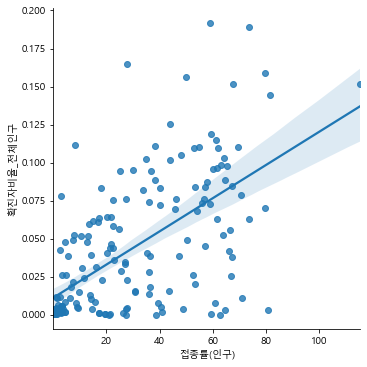

In [59]:
sns.lmplot(x='접종률(인구)', y='확진자비율_전체인구', data=df_corona_all_n)

### 인구당 확진자 발생 비율과 백신 접종률 상관관계 그래프 그려보기

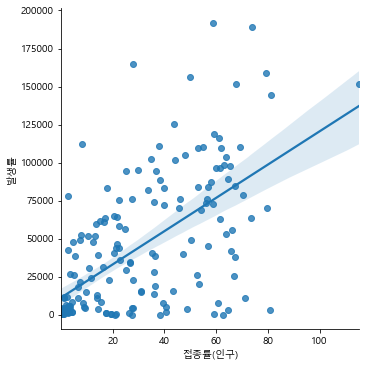

In [60]:
sns.lmplot(x='접종률(인구)', y='발생률', data=df_corona_all_n)

In [61]:
df_corona_all_n.corr()['접종률(인구)']['발생률']

0.6142512696614051

In [62]:
df_corona_all_n.corr()['접종률(인구)']['확진자비율_전체인구']

0.6139788352525628

### 01 현재까지의 누적된 데이터로 확인 결과 백신 접종률과 인구당 확진지 비율은 양의 상관관계를 갖는다.
### 02 현재까지의 누적된 데이터로 확인 결과 백신 접종률과 확진자 발생 비율은 양의 상관관계를 갖는다.